# Import Liberaries

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# import eda_helper_function


# Read the cleaned data

In [6]:
file_path="C:\\Users\\harsh\\OneDrive\\Desktop\\Flight_price_prediction\\Data\\train.csv"
train=pd.read_csv(file_path)
train.head()

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Indigo,2019-04-01,Kolkata,Banglore,21:00:00,02:15:00,5h 15m,1.0,No Info,5930
1,Indigo,2019-03-09,Chennai,Kolkata,05:15:00,07:35:00,2h 20m,0.0,No Info,6482
2,Air India,2019-04-09,Delhi,Cochin,20:15:00,19:15:00,23h,2.0,No Info,9916
3,Jet Airways,2019-06-01,Delhi,Cochin,18:15:00,19:00:00,24h 45m,1.0,No Info,14714
4,Multiple Carriers,2019-05-27,Delhi,Cochin,06:00:00,12:35:00,6h 35m,1.0,No Info,11264


In [7]:
train.dtypes
# see abhi bhi object show k r rha hai date vale columns ko

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration            object
total_stops        float64
additional_info     object
price                int64
dtype: object

In [8]:
 # i will update my column as changing ther dtypes
# i will use assign
# and i will pass dictionaryt this time so ets see how to write a code
train=train.assign(**{
    col:pd.to_datetime(train.loc[:, col])
    for col in ['date_of_journey', 'dep_time', 'arrival_time']
})
# see with this **  backend will under stand we will passs dictionary
# hmne kha col ko datetime m krdo
# col presend in [column names] i have given
#[:,col] means all rows and col that which we are giving

C:\Users\harsh\AppData\Local\Temp\ipykernel_10916\2082261084.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  col:pd.to_datetime(train.loc[:, col])
C:\Users\harsh\AppData\Local\Temp\ipykernel_10916\2082261084.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  col:pd.to_datetime(train.loc[:, col])


In [9]:
train.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                   object
total_stops               float64
additional_info            object
price                       int64
dtype: object

# High Level Undertanding of data

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          640 non-null    object        
 1   date_of_journey  640 non-null    datetime64[ns]
 2   source           640 non-null    object        
 3   destination      640 non-null    object        
 4   dep_time         640 non-null    datetime64[ns]
 5   arrival_time     640 non-null    datetime64[ns]
 6   duration         640 non-null    object        
 7   total_stops      639 non-null    float64       
 8   additional_info  640 non-null    object        
 9   price            640 non-null    int64         
dtypes: datetime64[ns](3), float64(1), int64(1), object(5)
memory usage: 50.1+ KB


In [11]:
train.describe()

,date_of_journey,dep_time,arrival_time,total_stops,price
count,640,640,640,639.000000,640.000000
mean,2019-05-05 13:23:15,2024-05-28 12:45:53.437500160,2024-05-28 13:44:04.218749952,0.784038,8901.859375
min,2019-03-01 00:00:00,2024-05-28 00:25:00,2024-05-28 00:05:00,0.000000,1759.000000
25%,2019-04-01 00:00:00,2024-05-28 07:55:00,2024-05-28 08:53:45,0.000000,5314.500000
50%,2019-05-15 00:00:00,2024-05-28 11:40:00,2024-05-28 13:45:00,1.000000,8016.000000
75%,2019-06-06 00:00:00,2024-05-28 18:15:00,2024-05-28 19:45:00,1.000000,12284.000000
max,2019-06-27 00:00:00,2024-05-28 23:55:00,2024-05-28 23:55:00,3.000000,31783.000000
std,NaN,NaN,NaN,0.653178,4303.142332


In [12]:
train.describe(include='number')

,total_stops,price
count,639.000000,640.000000
mean,0.784038,8901.859375
std,0.653178,4303.142332
min,0.000000,1759.000000
25%,0.000000,5314.500000
50%,1.000000,8016.000000
75%,1.000000,12284.000000
max,3.000000,31783.000000


In [13]:
def convert_into_minutes(ser):
    return (
        ser.
        str.split(" ", expand=True)
    .set_axis(['hour', 'minute'], axis=1)  # Correctly set axis names
    .assign(
        hour=lambda newdf: (
            newdf['hour']
            .str.replace('h', "")
            .fillna("0")
            .astype(int)
            .mul(60)  # Convert hours to minutes
        ),
        minute=lambda newdf: (
            newdf['minute']
            .str.replace('m', "")
            .fillna("0")
            .astype(int)
        )
    )
    .sum(axis=1)
        
    )

In [14]:
convert_into_minutes(train['duration'])

0       315
1       140
2      1380
3      1485
4       395
       ... 
635     590
636     135
637     810
638     440
639     175
Length: 640, dtype: int64

In [15]:
train=train.assign(
    duration=lambda newdf: newdf['duration'].pipe(convert_into_minutes)
)

In [16]:
train.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

In [17]:
train.describe(include='number')

,duration,total_stops,price
count,640.000000,639.000000,640.000000
mean,604.929688,0.784038,8901.859375
std,478.664878,0.653178,4303.142332
min,75.000000,0.000000,1759.000000
25%,175.000000,0.000000,5314.500000
50%,480.000000,1.000000,8016.000000
75%,876.250000,1.000000,12284.000000
max,2300.000000,3.000000,31783.000000


In [18]:
#total stops wer e, 0,1,2,3,4 means they are categoricl in future we will treat thm as cat

(
	train
	.assign(total_stops=train["total_stops"].astype(object))
	.describe(include="O")
)

,airline,source,destination,total_stops,additional_info
count,640,640,640,639.0,640
unique,9,5,6,4.0,4
top,Jet Airways,Delhi,Cochin,1.0,No Info
freq,245,270,270,340.0,495


# Missing Values

In [19]:
train.isna().sum()

airline            0
date_of_journey    0
source             0
destination        0
dep_time           0
arrival_time       0
duration           0
total_stops        1
additional_info    0
price              0
dtype: int64

# Let see Outliers

In [20]:
# gonna use Isolation Forest liberary
# it is type of random forest 
#in this we will rpovide many tress
#  klets say iahve 5 tres
# so every models first identyfy the numerical features
# lets say we ytalk about 1st trree
# after taking all numeric features
# it wil randomly pic one column
# from that random column it will randomly pick the vale
# and from that value it will split the observation
# and divide in to nodes like dt
# logic behind this if data point is outlir it will be different
# from the other points
# that point will be captured alon at the top itself
# this algo will return -1 and 1
# if -1 then it is outlier
# if 1 then its not
from sklearn.ensemble import IsolationForest


In [21]:
forest=IsolationForest(n_estimators=10, random_state=42)

In [22]:
train = train.dropna()

In [23]:

(
	train
	.assign(outlier=forest.fit_predict(
		train
		.drop(columns="price")
		.select_dtypes(include="number")
	))
	.query("outlier == -1")
    .duration
    .describe()
    # see vo numeric columns pr hi to kr rha hai
    # or abhi training we have 1 column duration
    
)
# we use query to do filtering rows

count     257.000000
mean      769.163424
std       622.930308
min        75.000000
25%       140.000000
50%       725.000000
75%      1380.000000
max      2300.000000
Name: duration, dtype: float64

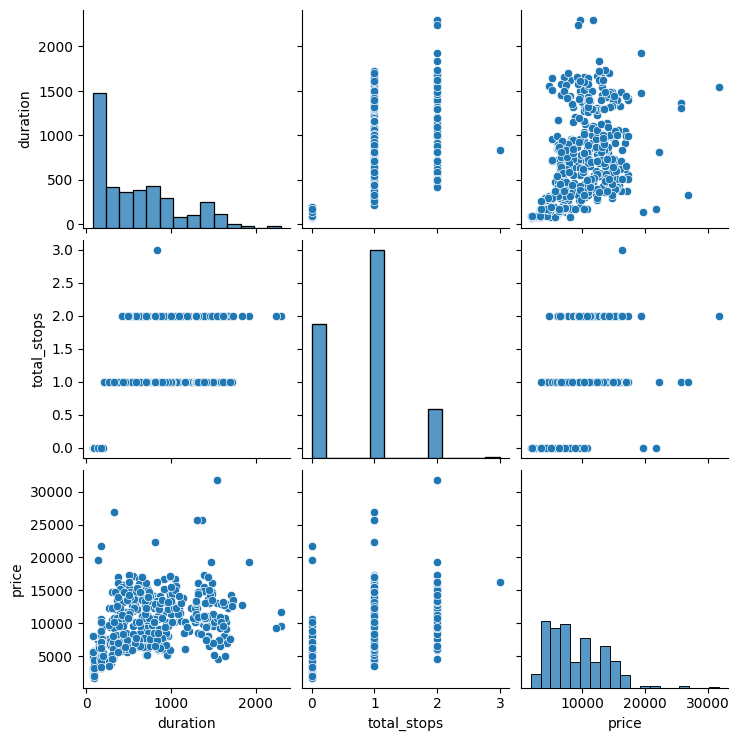

In [24]:
sns.pairplot(train)

In [25]:
corr_mat=train.select_dtypes(include='number').corr()
corr_mat

,duration,total_stops,price
duration,1.000000,0.714670,0.527429
total_stops,0.714670,1.000000,0.624137
price,0.527429,0.624137,1.000000


In [26]:
cm=train.corr(method='spearman', numeric_only=True)

<Axes: >

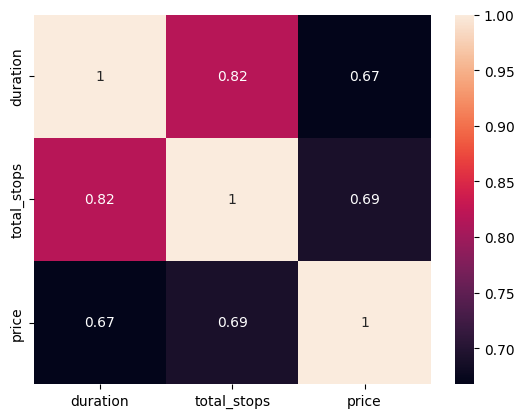

In [27]:
sns.heatmap(cm,annot=True)

In [28]:
from scipy import stats

In [29]:
def cramers_v(data, var1, var2):
  ct = pd.crosstab(
      data.loc[:, var1],
      data.loc[:, var2]
  )
  r, c = ct.shape
  n = ct.sum().sum()
  chi2 = stats.chi2_contingency(ct).statistic
  phi2 = chi2 / n

  # bias correction
  phi2_ = max(0, phi2 - ((r - 1) * (c - 1) / (n - 1)))
  r_ = r - (((r - 1) ** 2) / (n - 1))
  c_ = c - (((c - 1) ** 2) / (n - 1))

  return np.sqrt(phi2_ / min(r_ - 1, c_ - 1))

In [30]:

def cramersV_heatmap(data, figsize=(12, 6), cmap="Blues"):
  cols = data.select_dtypes(include="O").columns.to_list()

  matrix = (
      pd
      .DataFrame(data=np.ones((len(cols), len(cols))))
      .set_axis(cols, axis=0)
      .set_axis(cols, axis=1)
  )

  for col1 in cols:
    for col2 in cols:
      if col1 != col2:
        matrix.loc[col1, col2] = cramers_v(data, col1, col2)

  mask = np.zeros_like(matrix, dtype=bool)
  mask[np.triu_indices_from(mask)] = True
  
  fig, ax = plt.subplots(figsize=figsize)
  hm = sns.heatmap(
      matrix,
      vmin=0,
      vmax=1,
      cmap=cmap,
      annot=True,
      fmt=".2f",
      square=True,
      linewidths=1.5,
      mask=mask,
      ax=ax
  )
  ax.set(title="Cramer's V Correlation Matrix Heatmap")
#   rotate_xlabels(ax)
#   rotate_ylabels(ax)



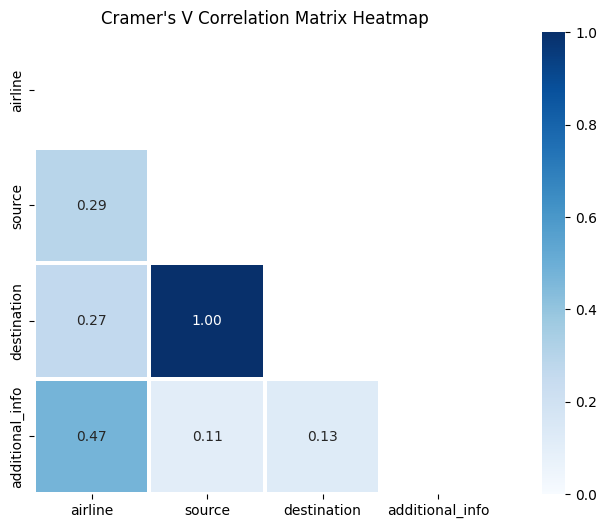

In [31]:
cramersV_heatmap(train)

<module 'eda_helper_function' from 'c:\\Users\\harsh\\OneDrive\\Desktop\\Flight_price_prediction\\notebooks\\eda_helper_function.py'>

In [32]:
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Indigo,2019-04-01,Kolkata,Banglore,2024-05-28 21:00:00,2024-05-28 02:15:00,315,1.0,No Info,5930
1,Indigo,2019-03-09,Chennai,Kolkata,2024-05-28 05:15:00,2024-05-28 07:35:00,140,0.0,No Info,6482
2,Air India,2019-04-09,Delhi,Cochin,2024-05-28 20:15:00,2024-05-28 19:15:00,1380,2.0,No Info,9916
3,Jet Airways,2019-06-01,Delhi,Cochin,2024-05-28 18:15:00,2024-05-28 19:00:00,1485,1.0,No Info,14714
4,Multiple Carriers,2019-05-27,Delhi,Cochin,2024-05-28 06:00:00,2024-05-28 12:35:00,395,1.0,No Info,11264
...,...,...,...,...,...,...,...,...,...,...
635,Jet Airways,2019-04-01,Kolkata,Banglore,2024-05-28 06:30:00,2024-05-28 16:20:00,590,1.0,In-flight meal not included,7851
636,Air India,2019-03-01,Chennai,Kolkata,2024-05-28 11:40:00,2024-05-28 13:55:00,135,0.0,No Info,19630
637,Indigo,2019-05-27,Delhi,Cochin,2024-05-28 07:30:00,2024-05-28 21:00:00,810,1.0,No Info,6526
638,Goair,2019-03-09,Delhi,Cochin,2024-05-28 06:00:00,2024-05-28 13:20:00,440,1.0,No Info,8422


# Detailed Analysis

In [33]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

In [34]:
# summary
# univariate plots
#Bivariate plots 
# hypothesis  testing
# multivariate plots
# inspect missing values and extreme values in depth
    # . Filter the neccesary susbets
    # . Inspect values of the other features

# note those observatiuon

In [35]:
#airline
train.airline

0                 Indigo
1                 Indigo
2              Air India
3            Jet Airways
4      Multiple Carriers
             ...        
635          Jet Airways
636            Air India
637               Indigo
638                Goair
639                Goair
Name: airline, Length: 639, dtype: object

In [42]:
from IPython.display import display, HTML

In [43]:

def display_html(size=3, content="content"):
  display(HTML(f"<h{size}>{content}</h{size}>"))

In [45]:
def cat_summary(data, var):
  import warnings
  warnings.filterwarnings("ignore")

  # title
  col = data.loc[:, var].copy()
  display_html(2, var)

  # quick glance
  display_html(3, "Quick Glance:")
  display(col)

  # meta-data
  display_html(3, "Meta-data:")
  print(f"{'Data Type':15}: {col.dtype}")
  print(f"{'Cardinality':15}: {col.nunique(dropna=True)} categories")
  print(f"{'Missing Data':15}: {col.isna().sum():,} rows ({col.isna().mean() * 100:.2f} %)")
  print(f"{'Available Data':15}: {col.count():,} / {len(col):,} rows")

  # summary
  display_html(3, "Summary:")
  display(
      col
      .describe()
      .rename("")
      .to_frame()
  )

  # categories
  display_html(3, "Categories Distribution:")
  with pd.option_context("display.max_rows", None):
    display(
        col
        .value_counts()
        .pipe(lambda ser: pd.concat(
            [
                ser,
                col.value_counts(normalize=True)
            ],
            axis=1
        ))
        .set_axis(["count", "percentage"], axis=1)
        .rename_axis(index="category")
    )

In [46]:
cat_summary(train, 'airline')

0                 Indigo
1                 Indigo
2              Air India
3            Jet Airways
4      Multiple Carriers
             ...        
635          Jet Airways
636            Air India
637               Indigo
638                Goair
639                Goair
Name: airline, Length: 639, dtype: object

Data Type      : object
Cardinality    : 9 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 639 / 639 rows


,
count,639
unique,9
top,Jet Airways
freq,245


,count,percentage
category,,
Jet Airways,245,0.383412
Indigo,119,0.186228
Multiple Carriers,84,0.131455
Air India,82,0.128326
Spicejet,46,0.071987
Vistara,25,0.039124
Air Asia,22,0.034429
Goair,15,0.023474
Vistara,1,0.001565


In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from scipy import stats
import statsmodels.api as sm
from sklearn.preprocessing import (
    PowerTransformer,
    OneHotEncoder,
    StandardScaler
)
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from wordcloud import WordCloud, STOPWORDS
from IPython.display import display, HTML


In [49]:
def get_top_k(data, var, k):
  col = data.loc[:, var].copy()
  cardinality = col.nunique(dropna=True)
  if k >= cardinality:
    raise ValueError(f"Cardinality of {var} is {cardinality}. K must be less than {cardinality}.")
  else:
    top_categories = (
        col
        .value_counts(dropna=True)
        .index[:k]
    )
    data = data.assign(**{
        var: np.where(
            col.isin(top_categories),
            col,
            "Other"
        )
    })
    return data

In [50]:
def pie_chart(counts, colors, ax):
  pie = ax.pie(
        counts.values,
        labels=counts.index,
        autopct="%.2f%%",
        colors=colors,
        wedgeprops=dict(alpha=0.7, edgecolor="black"),
  )

  ax.set_title("Pie Chart")

  ax.legend(
      loc="upper left",
      bbox_to_anchor=(1.02, 1),
      title="Categories",
      title_fontproperties=dict(weight="bold", size=10)
  )

  plt.setp(
      pie[2],
      weight="bold",
      color="white"
  )


def bar_chart(counts, colors, ax):
  barplot = ax.bar(
        x=range(len(counts)),
        height=counts.values,
        tick_label=counts.index,
        color=colors,
        edgecolor="black",
        alpha=0.7
  )

  ax.bar_label(
      barplot,
      padding=5,
      color="black"
  )

  ax.set(
      title="Bar Chart",
      xlabel="Categories",
      ylabel="Count"
  )

  ax.set_xticklabels(
      ax.get_xticklabels(),
      rotation=45,
      ha="right"
  )


def cat_univar_plots(data,
                     var,
                     k=None,
                     order=None,
                     show_wordcloud=True,
                     figsize=(12, 8.5)):
  display_html(2, f"Univariate Analysis of {var}")
  display_html(content="")

  fig = plt.figure(figsize=figsize)
  gs = GridSpec(2, 2, figure=fig)
  ax1 = fig.add_subplot(gs[0, 0]) # bar-chart
  ax2 = fig.add_subplot(gs[0, 1]) # pie-chart
  ax3 = fig.add_subplot(gs[1, :]) # word-cloud

  if k is None:
    counts = (
        data
        .loc[:, var]
        .value_counts()
        .reindex(index=order)
    )
  else:
    temp = get_top_k(
        data,
        var,
        k=k
    )
    counts = (
        temp
        .loc[:, var]
        .value_counts()
    )

  colors = [tuple(np.random.choice(256, size=3) / 255) for _ in range(len(counts))]

  # bar-chart
  bar_chart(
      counts,
      colors,
      ax1
  )

  # pie_chart
  pie_chart(
      counts,
      colors,
      ax2
  )

  # word-cloud
  if show_wordcloud:
    var_string = " ".join(
        data
        .loc[:, var]
        .dropna()
        .str.replace(" ", "_")
        .to_list()
    )

    word_cloud = WordCloud(
        width=2000,
        height=700,
        random_state=42,
        background_color="black",
        colormap="Set2",
        stopwords=STOPWORDS
    ).generate(var_string)

    ax3.imshow(word_cloud)
    ax3.axis("off")
    ax3.set_title("Word Cloud")
  else:
    ax3.remove()

  plt.tight_layout()
  plt.show()


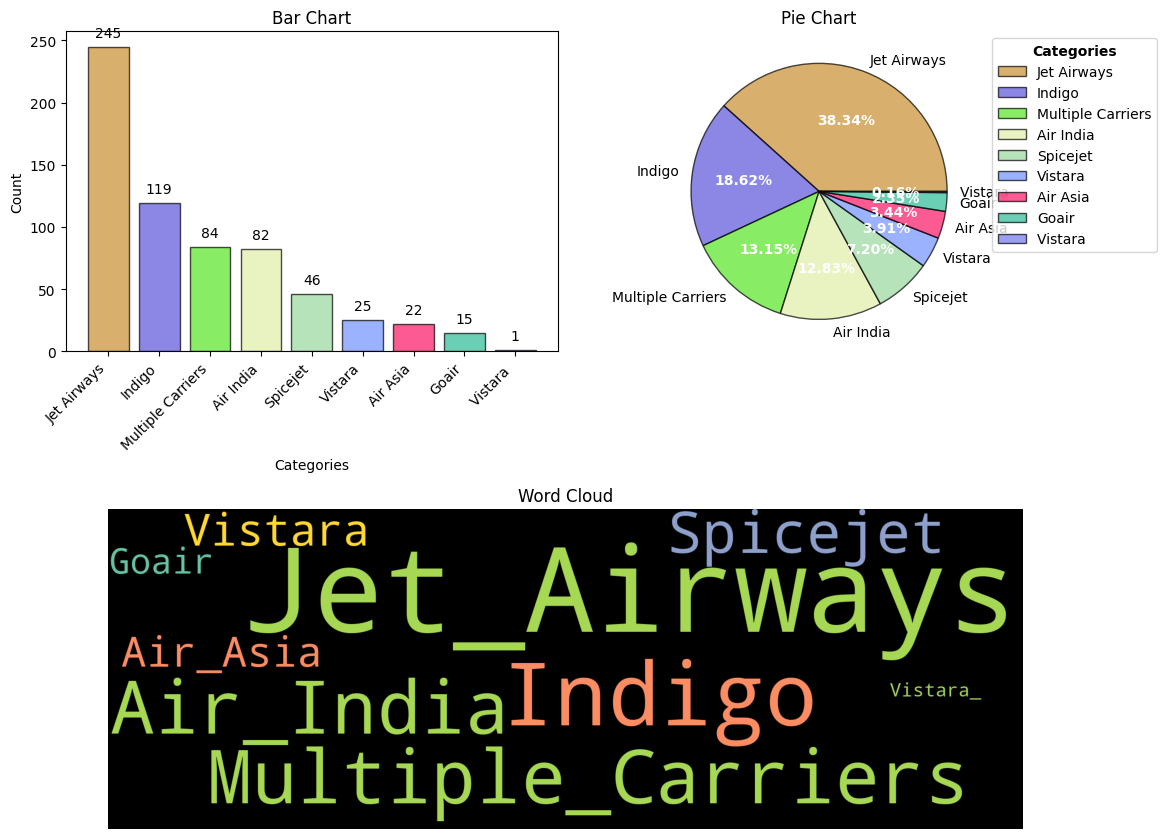

In [51]:
cat_univar_plots(train, 'airline')

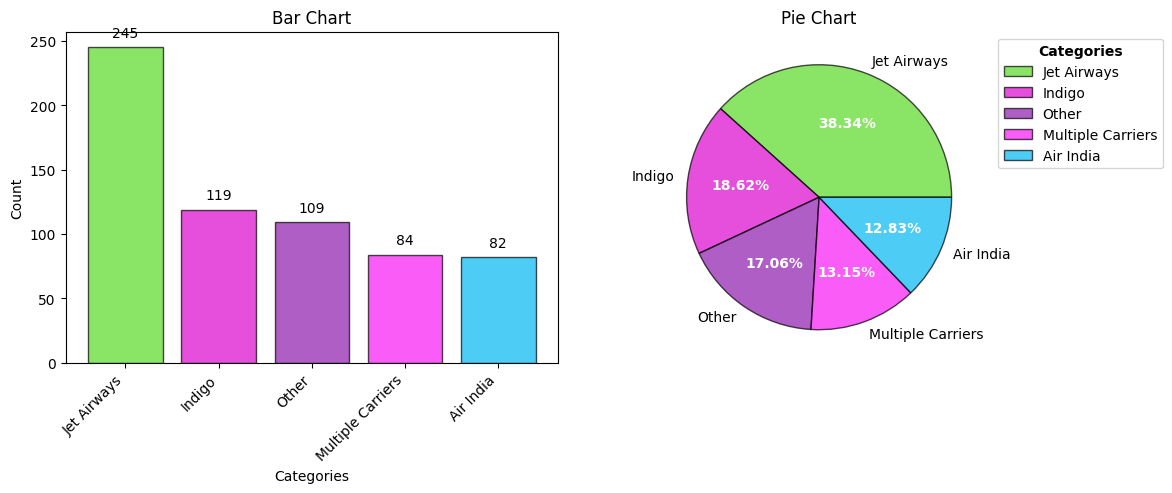

In [52]:
cat_univar_plots(train, 'airline',show_wordcloud=False,k=4)

In [53]:
def rotate_xlabels(ax, angle=35):
  ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=angle,
        ha="right"
    )
  


In [55]:
def rotate_ylabels(ax, angle=0):
  ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=angle
  )

In [56]:
# plot Bivariate plots

# bivariate plots between numeric and categorical variable 
def num_cat_bivar_plots(data,
                        num_var,
                        cat_var,
                        k=None,
                        estimator="mean",
                        orient="v",
                        order=None,
                        figsize=(15, 4)):

  def get_values(data,
                 num_var,
                 cat_var,
                 estimator,
                 order=None):
    return (
        data
        .groupby(cat_var)
        .agg(estimator, numeric_only=True)
        .loc[:, num_var]
        .dropna()
        .sort_values()
        .reindex(index=order)
    )

  import warnings
  warnings.filterwarnings("ignore")

  display_html(2, f"Bi-variate Analysis between {cat_var} and {num_var}")
  display_html(content="")

  if k is None:
    temp = get_values(
        data,
        num_var,
        cat_var,
        estimator,
        order=order
    )
  else:
    data = get_top_k(
        data,
        cat_var,
        k=k
    )
    temp = get_values(
        data,
        num_var,
        cat_var,
        estimator
    )

  if orient == "v":
    fig, axes = plt.subplots(1, 3, figsize=figsize)

    # bar plot
    bar = sns.barplot(
      x=temp.index,
      y=temp.values,
      color="#d92b2b",
      ax=axes[0],
      edgecolor="black",
      alpha=0.5
    )
    axes[0].set(
        title="Bar Plot",
        xlabel=cat_var,
        ylabel=num_var
    )
    rotate_xlabels(axes[0])

    # box plot
    sns.boxplot(
      data,
      x=cat_var,
      y=num_var,
      color="lightgreen",
      order=temp.index,
      ax=axes[1]
    )
    axes[1].set(
        title="Box Plot",
        xlabel=cat_var,
        ylabel=""
    )
    rotate_xlabels(axes[1])

    # violin plot
    sns.violinplot(
      data,
      x=cat_var,
      y=num_var,
      color="#0630c9",
      order=temp.index,
      ax=axes[2],
      alpha=0.5
    )
    axes[2].set(
        title="Violin Plot",
        xlabel=cat_var,
        ylabel=""
    )
    rotate_xlabels(axes[2])
  else:
    fig, axes = plt.subplots(3, 1, figsize=figsize)

    # bar plot
    bar = sns.barplot(
      y=temp.index,
      x=temp.values,
      color="#d92b2b",
      ax=axes[0],
      edgecolor="black",
      alpha=0.5
    )
    axes[0].set(
        title="Bar Plot",
        xlabel="",
        ylabel=cat_var
    )

    # box plot
    sns.boxplot(
      data,
      y=cat_var,
      x=num_var,
      color="lightgreen",
      order=temp.index,
      ax=axes[1]
    )
    axes[1].set(
        title="Box Plot",
        xlabel="",
        ylabel=cat_var
    )

    # violin plot
    sns.violinplot(
      data,
      y=cat_var,
      x=num_var,
      color="#0630c9",
      order=temp.index,
      ax=axes[2],
      alpha=0.5
    )
    axes[2].set(
        title="Violin Plot",
        xlabel=num_var,
        ylabel=cat_var
    )

  plt.tight_layout()
  plt.show()

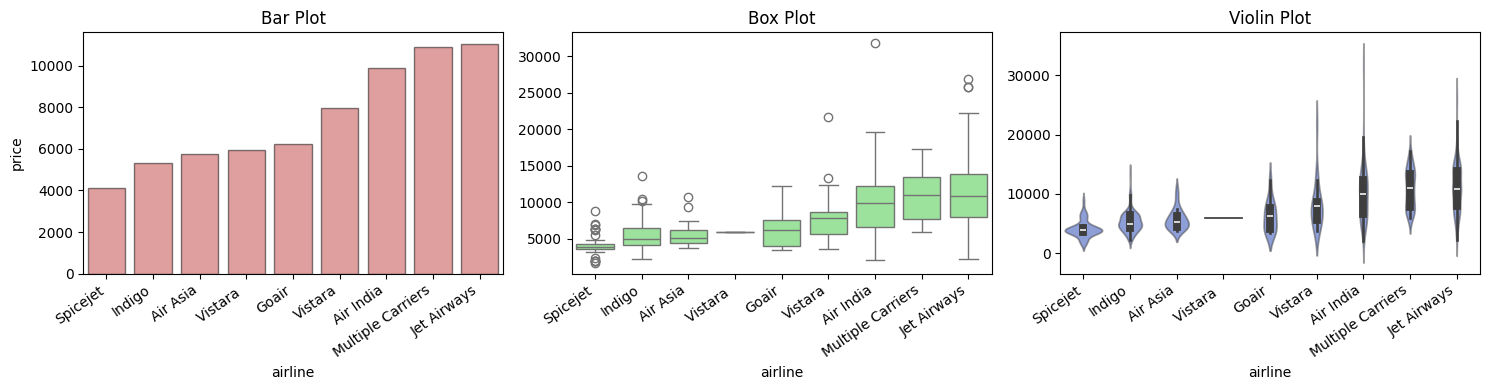

In [57]:
num_cat_bivar_plots(
    data=train,
    num_var='price',
    cat_var='airline'
)

In [58]:
#now why we plot these to check reltion of num and ct column
# now we will do hypothesis testing
# hypothesis testing for association between numeric and categorical variable
def num_cat_hyp_testing(data, num_var, cat_var, alpha=0.05):
  display_html(2, f"Hypothesis Test for Association between {num_var} and {cat_var}")

  groups_df = (
      data
      .dropna(subset=[num_var])
      .groupby(cat_var)
  )
  groups = [group[num_var].values for _, group in groups_df]

  # anova test
  anova = stats.f_oneway(*groups)
  statistic = anova[0]
  pvalue = anova[1]
  display_html(3, "ANOVA Test")
  print(f"- {'Significance Level':21}: {alpha * 100}%")
  print(f"- {'Null Hypothesis':21}: The groups have similar population mean")
  print(f"- {'Alternate Hypothesis':21}: The groups don't have similar population mean")
  print(f"- {'Test Statistic':21}: {statistic}")
  print(f"- {'p-value':21}: {pvalue}")
  if pvalue < alpha:
    print(f"- Since p-value is less than {alpha}, we Reject the Null Hypothesis at {alpha * 100}% significance level")
    print(f"- CONCLUSION: The variables {num_var} and {cat_var} are associated to each other")
  else:
    print(f"- Since p-value is greater than {alpha}, we Fail to Reject the Null Hypothesis at {alpha * 100}% significance level")
    print(f"- CONCLUSION: The variables {num_var} and {cat_var} are not associated to each other")

  # kruskal-wallis test
  kruskal = stats.kruskal(*groups)
  statistic = kruskal[0]
  pvalue = kruskal[1]
  display_html(3, "Kruskal-Wallis Test")
  print(f"- {'Significance Level':21}: {alpha * 100}%")
  print(f"- {'Null Hypothesis':21}: The groups have similar population median")
  print(f"- {'Alternate Hypothesis':21}: The groups don't have similar population median")
  print(f"- {'Test Statistic':21}: {statistic}")
  print(f"- {'p-value':21}: {pvalue}")
  if pvalue < alpha:
    print(f"- Since p-value is less than {alpha}, we Reject the Null Hypothesis at {alpha * 100}% significance level")
    print(f"- CONCLUSION: The variables {num_var} and {cat_var} are associated to each other")
  else:
    print(f"- Since p-value is greater than {alpha}, we Fail to Reject the Null Hypothesis at {alpha * 100}% significance level")
    print(f"- CONCLUSION: The variables {num_var} and {cat_var} are not associated to each other")

  

In [59]:
num_cat_hyp_testing(train, 'price', 'airline')

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 47.99576589266312
- p-value              : 2.2987936935824066e-60
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 295.8094981545232
- p-value              : 3.209349727242111e-59
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


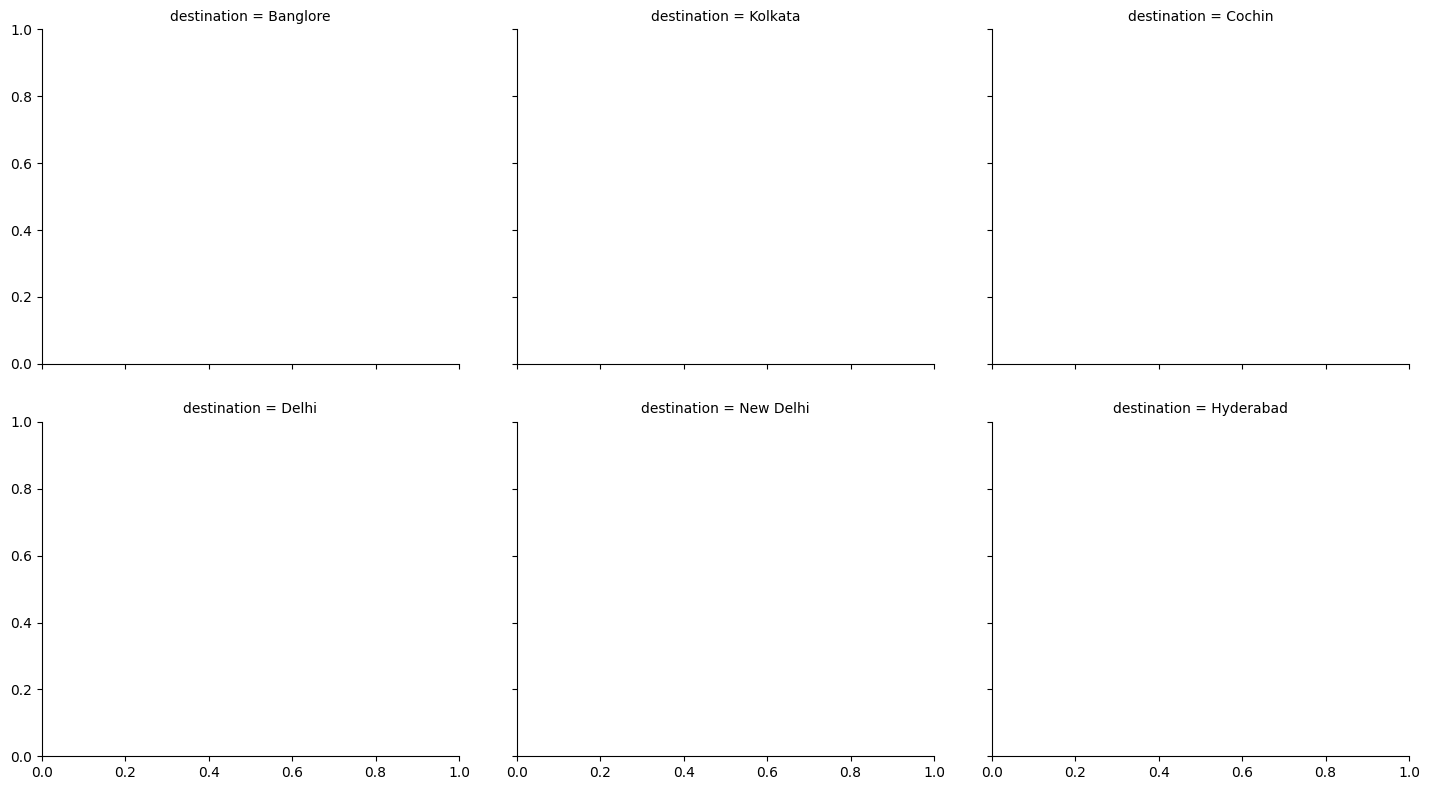

In [62]:

airline_grid = sns.FacetGrid(
	data=train,
	col="destination",
	col_wrap=3,
	height=4,
	aspect=1.2,
	sharey=True
)

# see for each category it make one plot

In [64]:
airline_grid.map(sns.barplot, "airline", "price")
plt.show()
# for ax in airline_grid.axes[3:]:
# 	rotate_xlabels(ax)

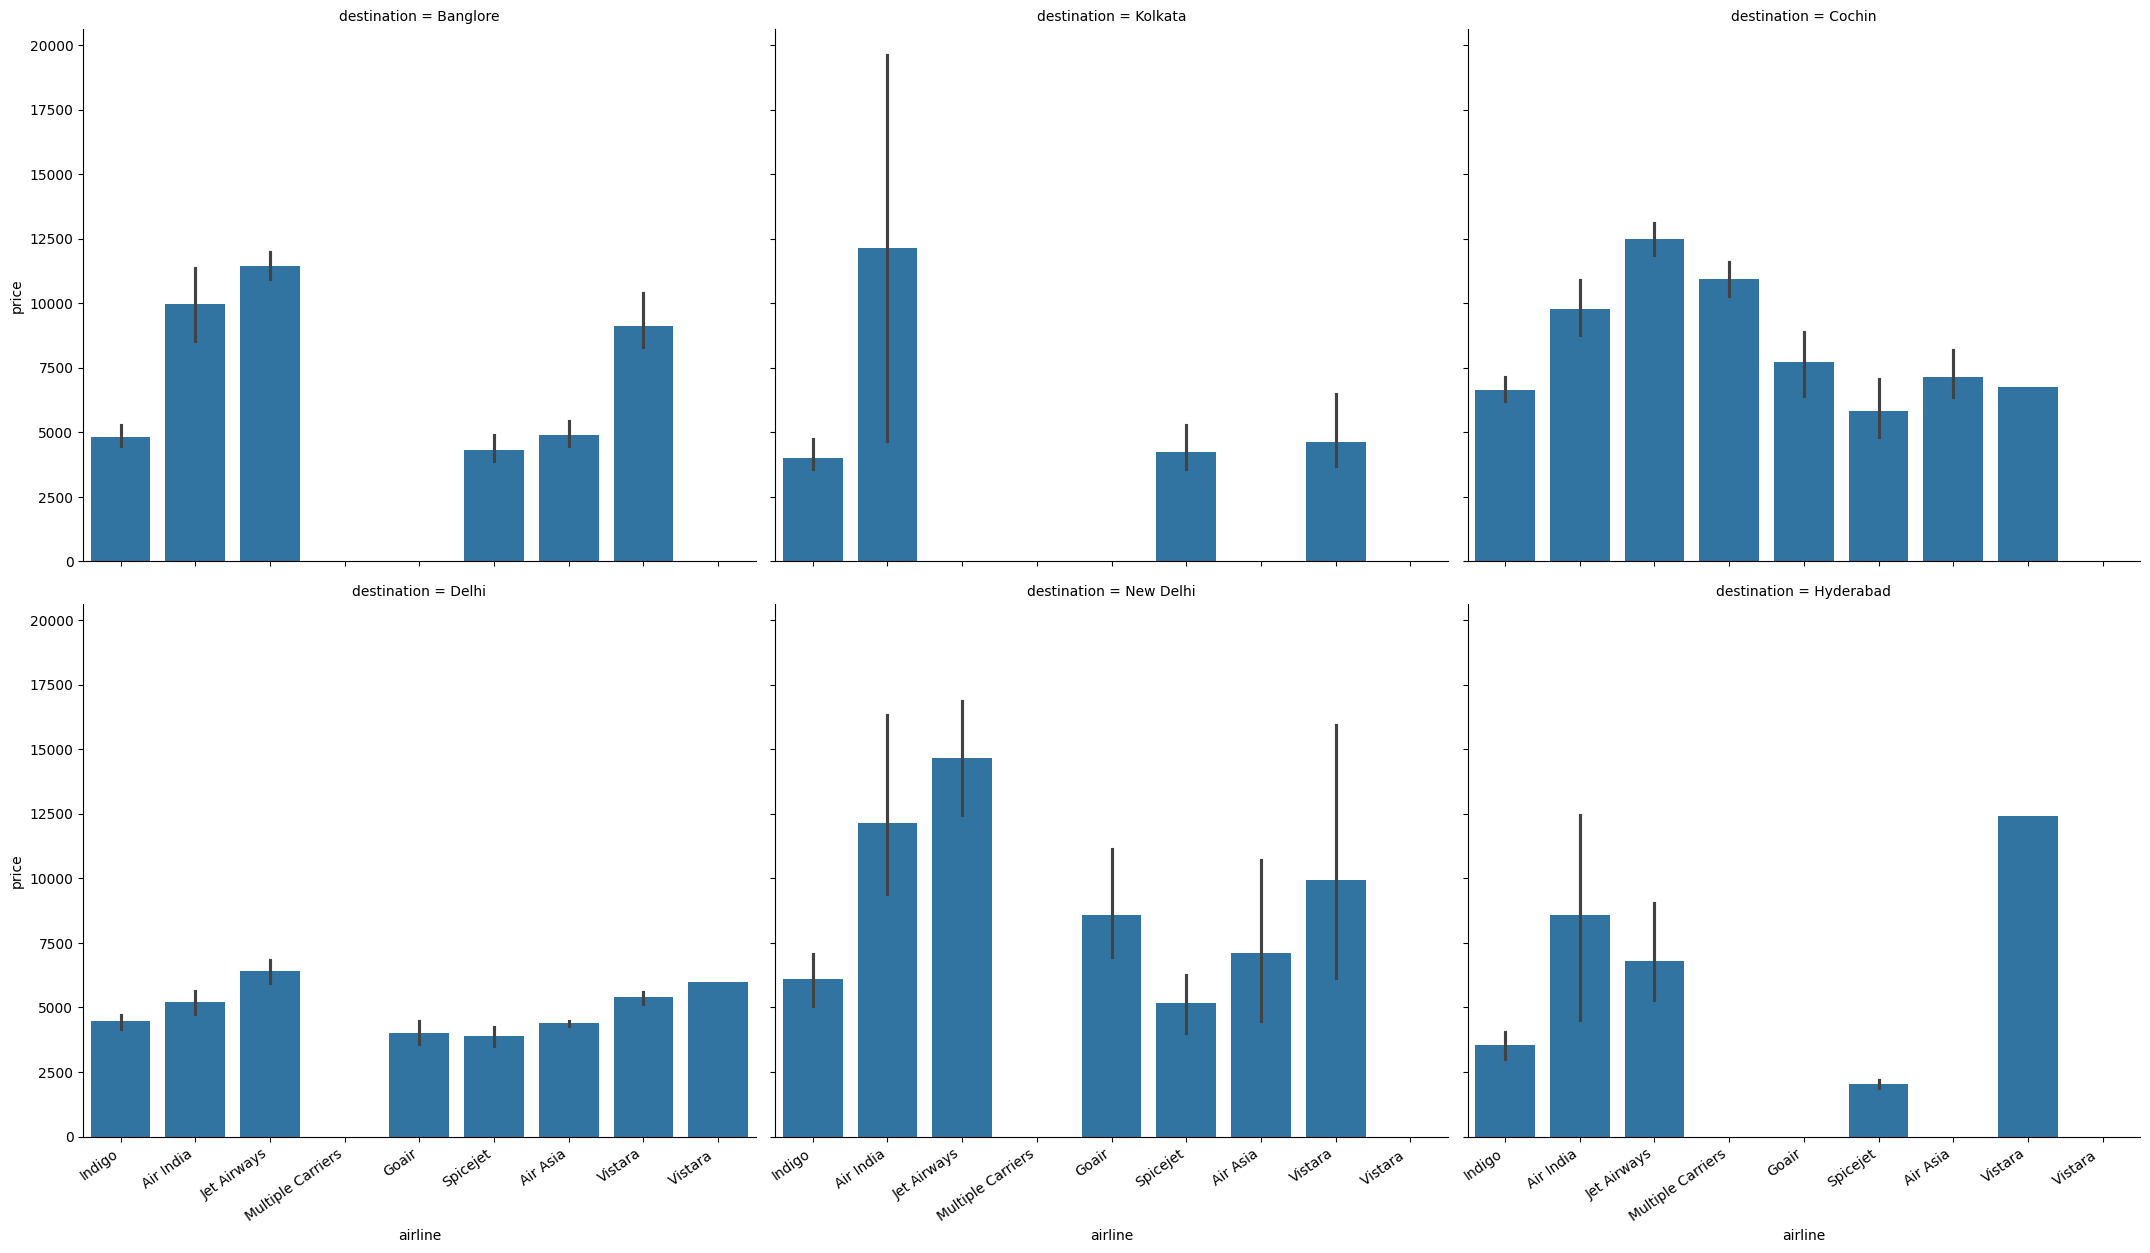

In [65]:
#Multivariate  on detination we are seeing which airline takes how much price
airline_grid = sns.FacetGrid(
	data=train,
	col="destination",
	col_wrap=3,
	height=6,
	aspect=1.2,
	sharey=True
)

airline_grid.map(sns.barplot, "airline", "price", order=train.airline.unique())

for ax in airline_grid.axes[3:]:
	rotate_xlabels(ax)


In [ ]:
# Dat

# Date Of Journey

In [66]:


# univariate plots for date-time variables
def dt_univar_plots(data, var, target=None, bins="auto"):
  display_html(3, f"Univariate plots of {var}")
  col = data.loc[:, var].copy()

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))

  # histogram
  sns.histplot(
    data=data,
    x=var,
    bins=bins,
    color="#1973bd",
    ax=ax1
  )
  sns.rugplot(
    data=data,
    x=var,
    color="darkblue",
    height=0.035,
    ax=ax1
  )
  ax1.set(title="Histogram")
  rotate_xlabels(ax1)

  # line-plot
  sns.lineplot(
    data=data,
    x=var,
    y=target,
    color="#d92b2b",
    ax=ax2
  )
  rotate_xlabels(ax2)
  ax2.set(title="Line Plot")

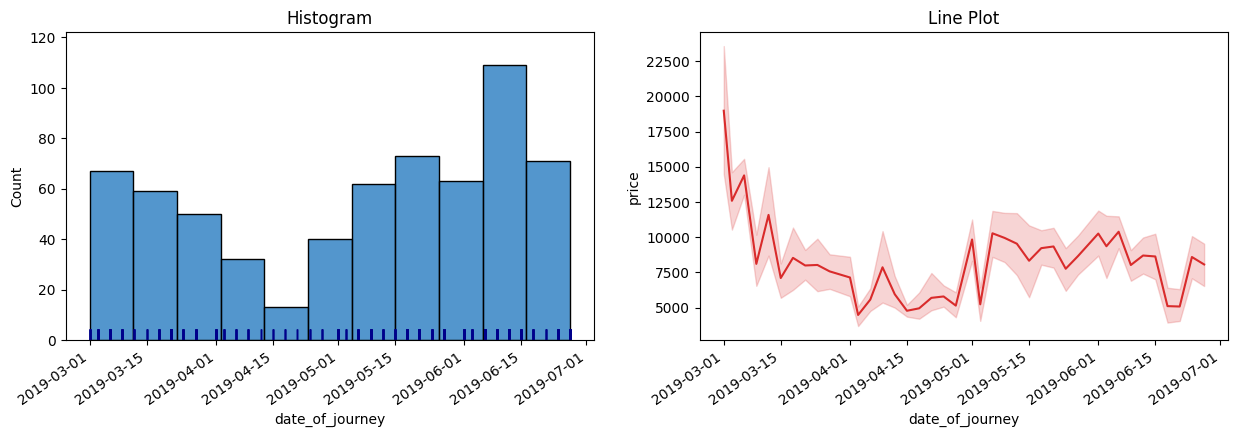

In [67]:
dt_univar_plots(data=train, 
                var='date_of_journey',
                target='price')

In [68]:
# lets do Bivariate  we will se avge proice  as per the date
(
    train
    .groupby(pd.Grouper(key='date_of_journey', freq='M'))
    # we are grou[ping daten on monthly basis]
    .price.mean()
    # mean nikal rhe hai har monnth ka
    .to_frame())

,price
date_of_journey,
2019-03-31,10348.829114
2019-04-30,5982.121622
2019-05-31,9124.963158
2019-06-30,8655.184332


In [69]:
(
    train
    .groupby(pd.Grouper(key='date_of_journey', freq='M'))
    # we are grou[ping daten on monthly basis]
    .price.mean()
    # mean nikal rhe hai har monnth ka
    .to_frame()
    .set_axis(['march','aprail', 'may', 'june'], axis=0)
    .rename_axis(index='Month'))

,price
Month,
march,10348.829114
aprail,5982.121622
may,9124.963158
june,8655.184332


<Axes: xlabel='month'>

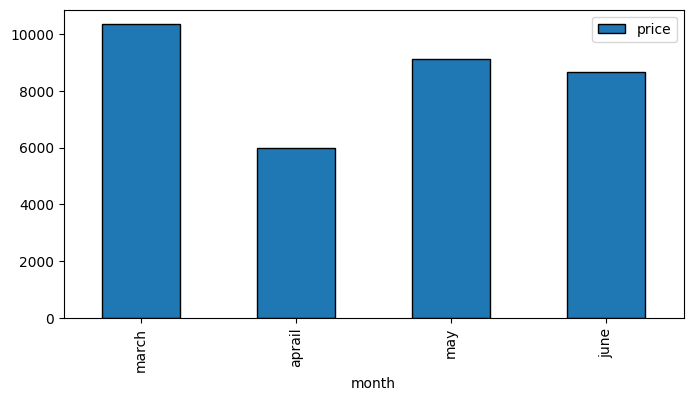

In [70]:
# let say i want monthly avg price
(
    train
    .groupby(pd.Grouper(key='date_of_journey', freq='M'))
    # we are grou[ping daten on monthly basis]
    .price.mean()
    # mean nikal rhe hai har monnth ka
    .to_frame()
    .set_axis(['march','aprail', 'may', 'june'], axis=0)
    .rename_axis(index='month')
    .plot(
        kind='bar',
        figsize=(8,4),
        edgecolor='black'
    )
    # whenever we group by datetime we use pd.Grouper
    # we will do on monthly basis
)

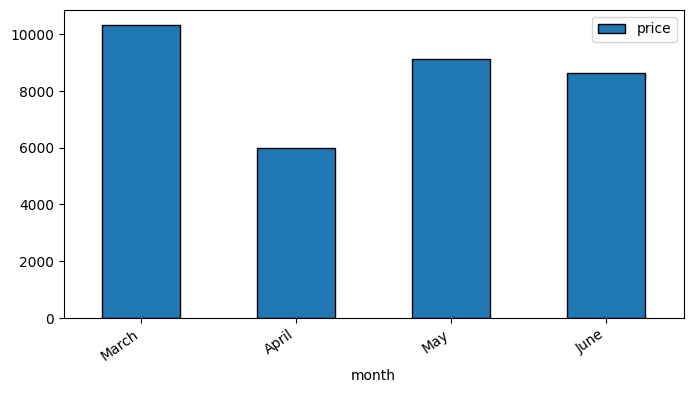

In [71]:
# if you want to rotate axis first take out the axis with gca
# get current axis
(
	train
	.groupby(pd.Grouper(key="date_of_journey", freq="M"))
	.price.mean()
	.to_frame()
	.set_axis(["March", "April", "May", "June"], axis=0)
	.rename_axis(index="month")
	.plot(
		kind="bar",
		figsize=(8, 4),
		edgecolor="black"
	)
)

ax = plt.gca()
rotate_xlabels(ax)

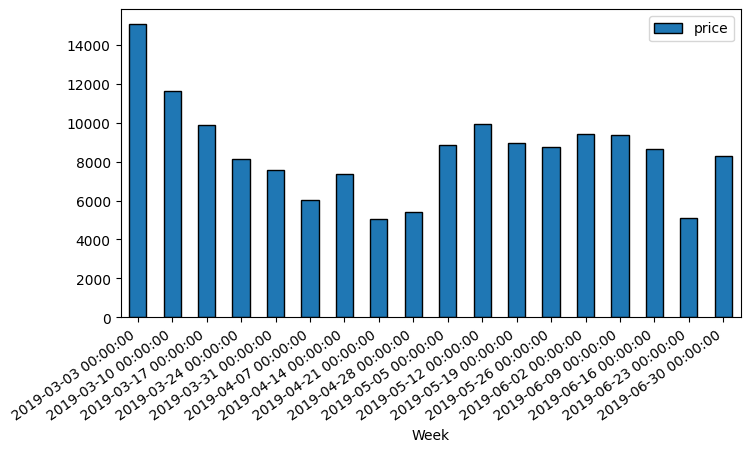

In [72]:
# lets doo weekly basis
(
	train
	.groupby(pd.Grouper(key="date_of_journey", freq="W"))
	.price.mean()
	.to_frame()
	#.set_axis(["March", "April", "May", "June"], axis=0)
	.rename_axis(index="Week")
	.plot(
		kind="bar",
		figsize=(8, 4),
		edgecolor="black"
	)
)

ax = plt.gca()
rotate_xlabels(ax)

In [73]:
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Indigo,2019-04-01,Kolkata,Banglore,2024-05-28 21:00:00,2024-05-28 02:15:00,315,1.0,No Info,5930
1,Indigo,2019-03-09,Chennai,Kolkata,2024-05-28 05:15:00,2024-05-28 07:35:00,140,0.0,No Info,6482
2,Air India,2019-04-09,Delhi,Cochin,2024-05-28 20:15:00,2024-05-28 19:15:00,1380,2.0,No Info,9916
3,Jet Airways,2019-06-01,Delhi,Cochin,2024-05-28 18:15:00,2024-05-28 19:00:00,1485,1.0,No Info,14714
4,Multiple Carriers,2019-05-27,Delhi,Cochin,2024-05-28 06:00:00,2024-05-28 12:35:00,395,1.0,No Info,11264
...,...,...,...,...,...,...,...,...,...,...
635,Jet Airways,2019-04-01,Kolkata,Banglore,2024-05-28 06:30:00,2024-05-28 16:20:00,590,1.0,In-flight meal not included,7851
636,Air India,2019-03-01,Chennai,Kolkata,2024-05-28 11:40:00,2024-05-28 13:55:00,135,0.0,No Info,19630
637,Indigo,2019-05-27,Delhi,Cochin,2024-05-28 07:30:00,2024-05-28 21:00:00,810,1.0,No Info,6526
638,Goair,2019-03-09,Delhi,Cochin,2024-05-28 06:00:00,2024-05-28 13:20:00,440,1.0,No Info,8422


# # lets Do Multivariate

In [74]:
# we will calculate airline  avg price on every week
(
    train
    .groupby([pd.Grouper(key='date_of_journey', freq="M"), "source"])
    # see this is how we give multivariate columns
    # mne data of journey nikali month k hisab on Source kha jana hai
    #  banglore m 2019-03-31 k month ppr avg price ye the 11165.333
    .price.mean()
    .to_frame()
)
# but this is not looking goofd instewad of this ku na m picot krdu


price
date_of_journey source                
2019-03-31      Banglore  11165.483333
                Chennai    9225.200000
                Delhi     11028.426230
                Kolkata    7961.692308
                Mumbai     7517.052632
2019-04-30      Banglore   5485.120000
                Delhi      7614.785714
                Kolkata    5864.103448
                Mumbai     4813.833333
2019-05-31      Banglore   5125.541667
                Chennai    3721.375000
                Delhi     10560.661538
                Kolkata   10290.341463
                Mumbai     4609.818182
2019-06-30      Banglore   5761.181818
                Chennai    3661.777778
                Delhi     10299.100775
                Kolkata    7708.837209
                Mumbai     4172.071429

In [75]:
(
    train
    .groupby([pd.Grouper(key='date_of_journey', freq="M"), "source"])
    # see this is how we give multivariate columns
    # mne data of journey nikali month k hisab on Source kha jana hai
    #  banglore m 2019-03-31 k month ppr avg price ye the 11165.333
    .price.mean()
    .to_frame()
    .unstack(fill_value=0)
)

price                                           \
source               Banglore      Chennai         Delhi       Kolkata   
date_of_journey                                                          
2019-03-31       11165.483333  9225.200000  11028.426230   7961.692308   
2019-04-30        5485.120000     0.000000   7614.785714   5864.103448   
2019-05-31        5125.541667  3721.375000  10560.661538  10290.341463   
2019-06-30        5761.181818  3661.777778  10299.100775   7708.837209   

                              
source                Mumbai  
date_of_journey               
2019-03-31       7517.052632  
2019-04-30       4813.833333  
2019-05-31       4609.818182  
2019-06-30       4172.071429

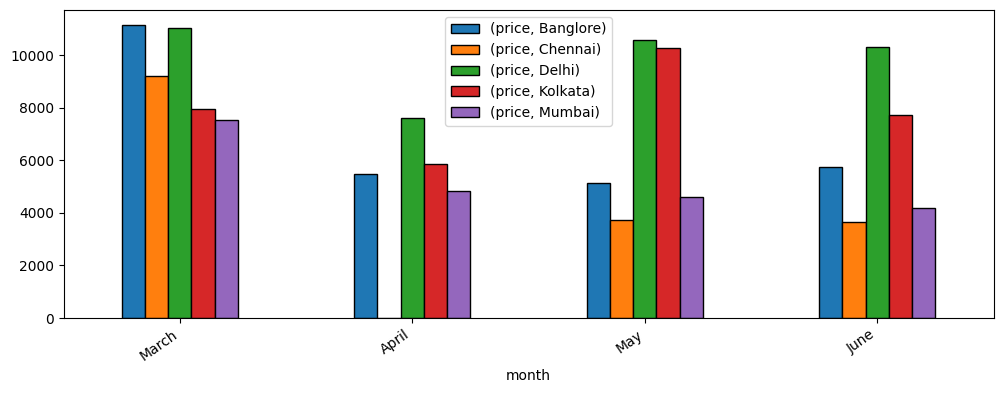

In [76]:
(
    train
    .groupby([pd.Grouper(key='date_of_journey', freq="M"), "source"])
    # see this is how we give multivariate columns
    # mne data of journey nikali month k hisab on Source kha jana hai
    #  banglore m 2019-03-31 k month ppr avg price ye the 11165.333
    .price.mean()
    .to_frame()
    .unstack(fill_value=0)
    .set_axis(['March', 'April', 'May', 'June'],axis=0)
    .rename_axis(index='month')
    .plot(
        kind='bar',
        figsize=(12,4),
        edgecolor='black'
    )
)
ax=plt.gca()
ax.legend(
)
rotate_xlabels(ax)

# Dep_time

In [77]:
train['dep_time']

0     2024-05-28 21:00:00
1     2024-05-28 05:15:00
2     2024-05-28 20:15:00
3     2024-05-28 18:15:00
4     2024-05-28 06:00:00
              ...        
635   2024-05-28 06:30:00
636   2024-05-28 11:40:00
637   2024-05-28 07:30:00
638   2024-05-28 06:00:00
639   2024-05-28 07:45:00
Name: dep_time, Length: 639, dtype: datetime64[ns]

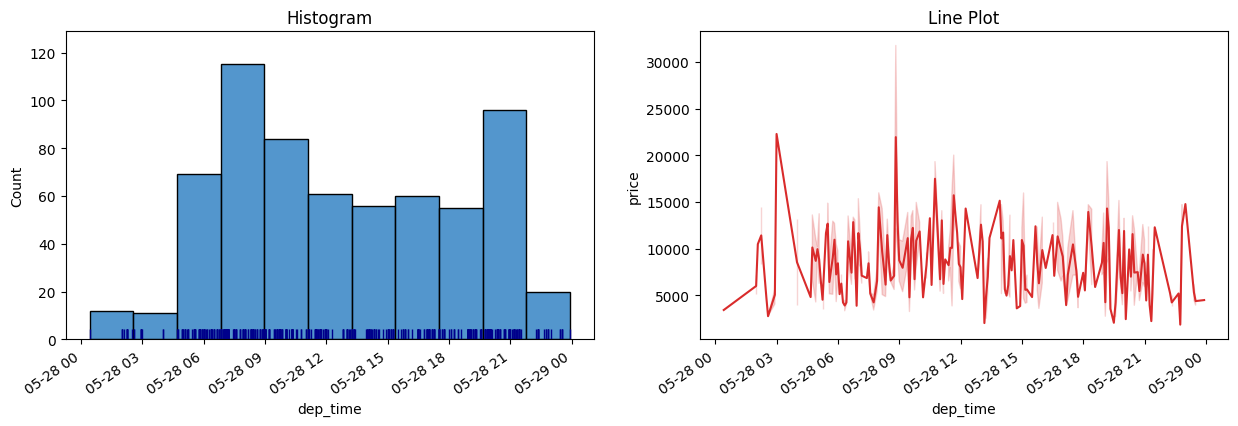

In [78]:
# see ye date vpo dikha a rha h jiss dtae pr hmne convert kiya\
# actual value in dep time is 21:00:00 this is it vo date 24 tarike ki dikha rha hai
# we have  hour, minute, seconds
dt_univar_plots(train, 'dep_time', 'price')
#see on x axis we have first date hai aj ki 27-05 leabe that 
# we have 00 , 03, 06, 09,12 15,18,21,00
# ye kya hai?
# 00 is 12:00 am to 03 is 3 am
# this is telling betwwn this time how many fligts get departured
#  see between 6 to 9 am we have highest number of  flights departured

# where as in line plot we have price and time
# kiparticular time m kya avg price rhta hai 
# again 9 am we have the highest avg price


In [79]:
import numpy as np

In [80]:
# but dont you think this is not detailed bcoz ye vala date k lie bhi btarha
# why dont we convert our time in part of the day
(
    train
    .dep_time
    .dt.hour
    # ham hour nikal rhe hai time m se
    .pipe(lambda ser : pd.Series(np.select([ser.between(4,12, inclusive="left"),
                                  ser.between(12,16, inclusive="left"),
                                  ser.between(16,20, inclusive="left")],
                                 ["morning",
                                  "afternoon",
                                  "evening"],
                                default="night"
                                 )))
    # thisnp.select takes 3 parameter
    # 1 list, 2 list , 3 default value
    # se 1st liste m we give condition ki 4 se 12 hai morning
    # 12 se 16  to after noon
    # and default is night
    
)

0        night
1      morning
2        night
3      evening
4      morning
        ...   
634    morning
635    morning
636    morning
637    morning
638    morning
Length: 639, dtype: object

In [81]:
#we will make temp column
(
    train
    .assign(dep_time=lambda ser : (np.select([ser.dep_time.dt.hour.between(4,12, inclusive="left"),
                                  ser.dep_time.dt.hour.between(12,16, inclusive="left"),
                                  ser.dep_time.dt.hour.between(16,20, inclusive="left")],
                                 ["morning",
                                  "afternoon",
                                  "evening"],
                                default="night"
                                 ))                             
                                 )
)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Indigo,2019-04-01,Kolkata,Banglore,night,2024-05-28 02:15:00,315,1.0,No Info,5930
1,Indigo,2019-03-09,Chennai,Kolkata,morning,2024-05-28 07:35:00,140,0.0,No Info,6482
2,Air India,2019-04-09,Delhi,Cochin,night,2024-05-28 19:15:00,1380,2.0,No Info,9916
3,Jet Airways,2019-06-01,Delhi,Cochin,evening,2024-05-28 19:00:00,1485,1.0,No Info,14714
4,Multiple Carriers,2019-05-27,Delhi,Cochin,morning,2024-05-28 12:35:00,395,1.0,No Info,11264
...,...,...,...,...,...,...,...,...,...,...
635,Jet Airways,2019-04-01,Kolkata,Banglore,morning,2024-05-28 16:20:00,590,1.0,In-flight meal not included,7851
636,Air India,2019-03-01,Chennai,Kolkata,morning,2024-05-28 13:55:00,135,0.0,No Info,19630
637,Indigo,2019-05-27,Delhi,Cochin,morning,2024-05-28 21:00:00,810,1.0,No Info,6526
638,Goair,2019-03-09,Delhi,Cochin,morning,2024-05-28 13:20:00,440,1.0,No Info,8422


In [82]:
def cat_univar_plots(data,
                     var,
                     k=None,
                     order=None,
                     show_wordcloud=True,
                     figsize=(12, 8.5)):
  display_html(2, f"Univariate Analysis of {var}")
  display_html(content="")

  fig = plt.figure(figsize=figsize)
  gs = GridSpec(2, 2, figure=fig)
  ax1 = fig.add_subplot(gs[0, 0]) # bar-chart
  ax2 = fig.add_subplot(gs[0, 1]) # pie-chart
  ax3 = fig.add_subplot(gs[1, :]) # word-cloud

  if k is None:
    counts = (
        data
        .loc[:, var]
        .value_counts()
        .reindex(index=order)
    )
  else:
    temp = get_top_k(
        data,
        var,
        k=k
    )
    counts = (
        temp
        .loc[:, var]
        .value_counts()
    )

  colors = [tuple(np.random.choice(256, size=3) / 255) for _ in range(len(counts))]

  # bar-chart
  bar_chart(
      counts,
      colors,
      ax1
  )

  # pie_chart
  pie_chart(
      counts,
      colors,
      ax2
  )

  # word-cloud
  if show_wordcloud:
    var_string = " ".join(
        data
        .loc[:, var]
        .dropna()
        .str.replace(" ", "_")
        .to_list()
    )

    word_cloud = WordCloud(
        width=2000,
        height=700,
        random_state=42,
        background_color="black",
        colormap="Set2",
        stopwords=STOPWORDS
    ).generate(var_string)

    ax3.imshow(word_cloud)
    ax3.axis("off")
    ax3.set_title("Word Cloud")
  else:
    ax3.remove()

  plt.tight_layout()
  plt.show()

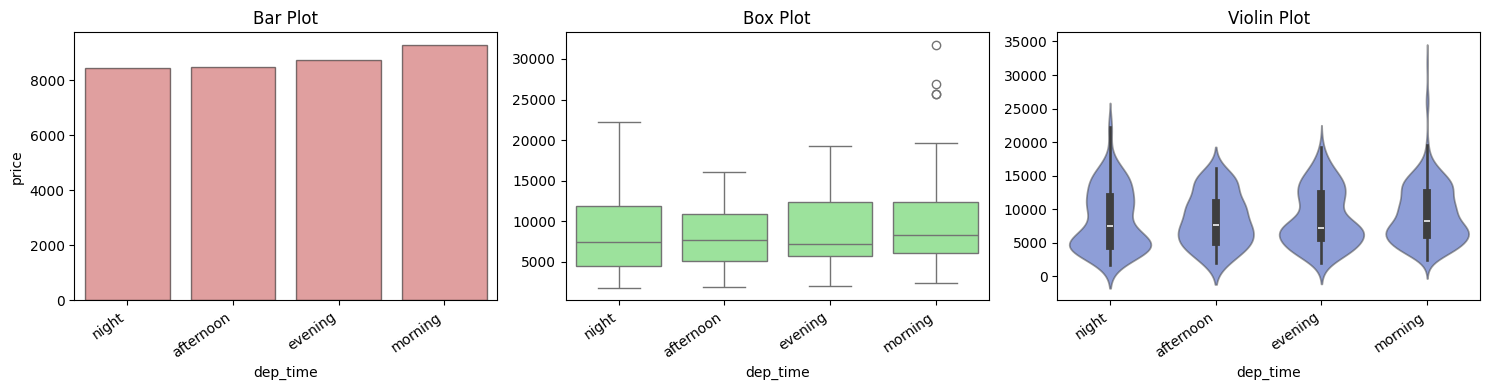

In [83]:
# lets plot them
# Plot using .pipe
(train
 .assign(
     dep_time=lambda df: np.select(
         [
             df.dep_time.dt.hour.between(4, 12, inclusive="left"),
             df.dep_time.dt.hour.between(12, 16, inclusive="left"),
             df.dep_time.dt.hour.between(16, 20, inclusive="left")
         ],
         [
             "morning",
             "afternoon",
             "evening"
         ],
         default="night"
     )
 )
 .pipe(lambda df: num_cat_bivar_plots(df,'price', 'dep_time'))
)

# see ham   ek temp  column bnake check kr rhe hai ki is this good if yes so we will 
# make this column

In [84]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

# Duration Numeric column

In [86]:
# gives detailed summary of numeric features
def num_summary(data, var):
  import warnings
  warnings.filterwarnings("ignore")

  # title
  col = data.loc[:, var].copy()
  display_html(size=2, content=var)

  # quick glance
  display_html(3, "Quick Glance:")
  display(col)

  # meta-data
  display_html(3, "Meta-data:")
  print(f"{'Data Type':15}: {col.dtype}")
  print(f"{'Missing Data':15}: {col.isna().sum():,} rows ({col.isna().mean() * 100:.2f} %)")
  print(f"{'Available Data':15}: {col.count():,} / {len(col):,} rows")

  # quantiles
  display_html(3, "Percentiles:")
  display(
      col
      .quantile([0.0, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 1.0])
      .rename(index=lambda val: f"{val * 100:.0f}")
      .rename("value")
      .rename_axis(index="percentile")
      .to_frame()
  )

  # central tendancy
  display_html(3, "Central Tendancy:")
  display(
      pd
      .Series({"mean": col.mean(),
               "trimmed mean (5%)": stats.trim_mean(col.values, 0.05),
               "trimmed mean (10%)": stats.trim_mean(col.values, 0.1),
               "median": col.median()})
      .rename("value")
      .to_frame()
  )

  # spread
  display_html(3, "Measure of Spread:")
  std = col.std()
  iqr = col.quantile(0.75) - col.quantile(0.25)
  display(
      pd
      .Series({
          "var": col.var(),
          "std": std,
          "IQR": iqr,
          "mad": stats.median_abs_deviation(col.dropna()),
          "coef_variance": std / col.mean()
      })
      .rename("value")
      .to_frame()
  )

  # skewness and kurtosis
  display_html(3, "Skewness and Kurtosis:")
  display(
      pd
      .Series({
          "skewness": col.skew(),
          "kurtosis": col.kurtosis()
      })
      .rename("value")
      .to_frame()
  )

  alpha = 0.05
  # test for normality
  display_html(3, "Hypothesis Testing for Normality:")
  # shapiro-wilk test
  display_html(4, "Shapiro-Wilk Test:")
  sw_test = stats.shapiro(col.dropna().values)
  sw_statistic = sw_test.statistic
  sw_pvalue = sw_test.pvalue
  print(f"{'Significance Level':21}: {alpha}")
  print(f"{'Null Hypothesis':21}: The data is normally distributed")
  print(f"{'Alternate Hypothesis':21}: The data is not normally distributed")
  print(f"{'p-value':21}: {sw_pvalue}")
  print(f"{'Test Statistic':21}: {sw_statistic}")
  if sw_pvalue < alpha:
    print(f"- Since p-value is less than alpha ({alpha}), we Reject the Null Hypothesis at {alpha * 100}% significance level")
    print("- CONCLUSION: We conclude that the data sample is not normally distributed")
  else:
    print(f"- Since p-value is greater than alpha ({alpha}), we Fail to Reject the Null Hypothesis at {alpha * 100}% significance level")
    print("- CONCLUSION: We conclude that the data sample is normally distributed")

  #anderson-darling test
  display_html(4, "Anderson-Darling Test:")
  ad_test = stats.anderson(col.dropna().values, dist="norm")
  ad_statistic = ad_test.statistic
  ad_critical = ad_test.critical_values[2]
  print(f"{'Significance Level':21}: {alpha}")
  print(f"{'Null Hypothesis':21}: The data is normally distributed")
  print(f"{'Alternate Hypothesis':21}: The data is not normally distributed")
  print(f"{'Critical Value':21}: {ad_critical}")
  print(f"{'Test Statistic':21}: {ad_statistic}")
  if ad_statistic >= ad_critical:
    print(f"- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at {alpha * 100}% significance level")
    print("- CONCLUSION: We conclude that the data sample is not normally distributed")
  else:
    print(f"- Since the Test-statistic is less than Critical Value, we Fail to Reject the Null Hypothesis at {alpha * 100}% significance level")
    print("- CONCLUSION: We conclude that the data sample is normally distributed")



In [87]:
num_summary(train,'duration')

0       315
1       140
2      1380
3      1485
4       395
       ... 
635     590
636     135
637     810
638     440
639     175
Name: duration, Length: 639, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 639 / 639 rows


,value
percentile,
0,75.0
5,90.0
10,140.0
25,175.0
50,480.0
75,872.5
90,1396.0
95,1545.0
99,1714.3


,value
mean,603.654147
trimmed mean (5%),571.915078
trimmed mean (10%),544.571150
median,480.000000


,value
var,228436.273615
std,477.950074
IQR,697.500000
mad,315.000000
coef_variance,0.791761


,value
skewness,0.900067
kurtosis,-0.041113


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 1.970604753484405e-21
Test Statistic       : 0.884403378710853
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.782
Test Statistic       : 24.018190066813986
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


In [88]:
# univariate plots for numeric variables
def num_univar_plots(data, var, bins=10, figsize=(15, 7)):
  display_html(2, f"Univariate Analysis of {var}")
  display_html(content="")
  col = data.loc[:, var].copy()

  fig, axes = plt.subplots(2, 3, figsize=figsize)
  axes = axes.ravel()

  #histogram
  sns.histplot(
      data,
      x=var,
      bins=bins,
      kde=True,
      color="#1973bd",
      ax=axes[0],
  )
  sns.rugplot(
      data,
      x=var,
      color="black",
      height=0.035,
      ax=axes[0]
  )
  axes[0].set(title="Histogram")

  # cdf
  sns.ecdfplot(
      data,
      x=var,
      ax=axes[1],
      color="red"
  )
  axes[1].set(title="CDF")

  # power transform
  data = data.assign(**{
      f"{var}_pwt": (
          PowerTransformer()
          .fit_transform(data.loc[:, [var]])
          .ravel()
      )
  })
  sns.kdeplot(
      data,
      x=f"{var}_pwt",
      fill=True,
      color="#f2b02c",
      ax=axes[2]
  )
  sns.rugplot(
      data,
      x=f"{var}_pwt",
      color="black",
      height=0.035,
      ax=axes[2]
  )
  axes[2].set(title="Power Transformed")

  # box plot
  sns.boxplot(
      data,
      x=var,
      color="#4cd138",
      ax=axes[3]
  )
  axes[3].set(title="Box Plot")

  # violin plot
  sns.violinplot(
      data,
      x=var,
      color="#ed68b4",
      ax=axes[4]
  )
  axes[4].set(title="Violin Plot")

  # qq plot
  sm.qqplot(
      col.dropna(),
      line="45",
      fit=True,
      ax=axes[5]
  )
  axes[5].set(title="QQ Plot")

  plt.tight_layout()
  plt.show()

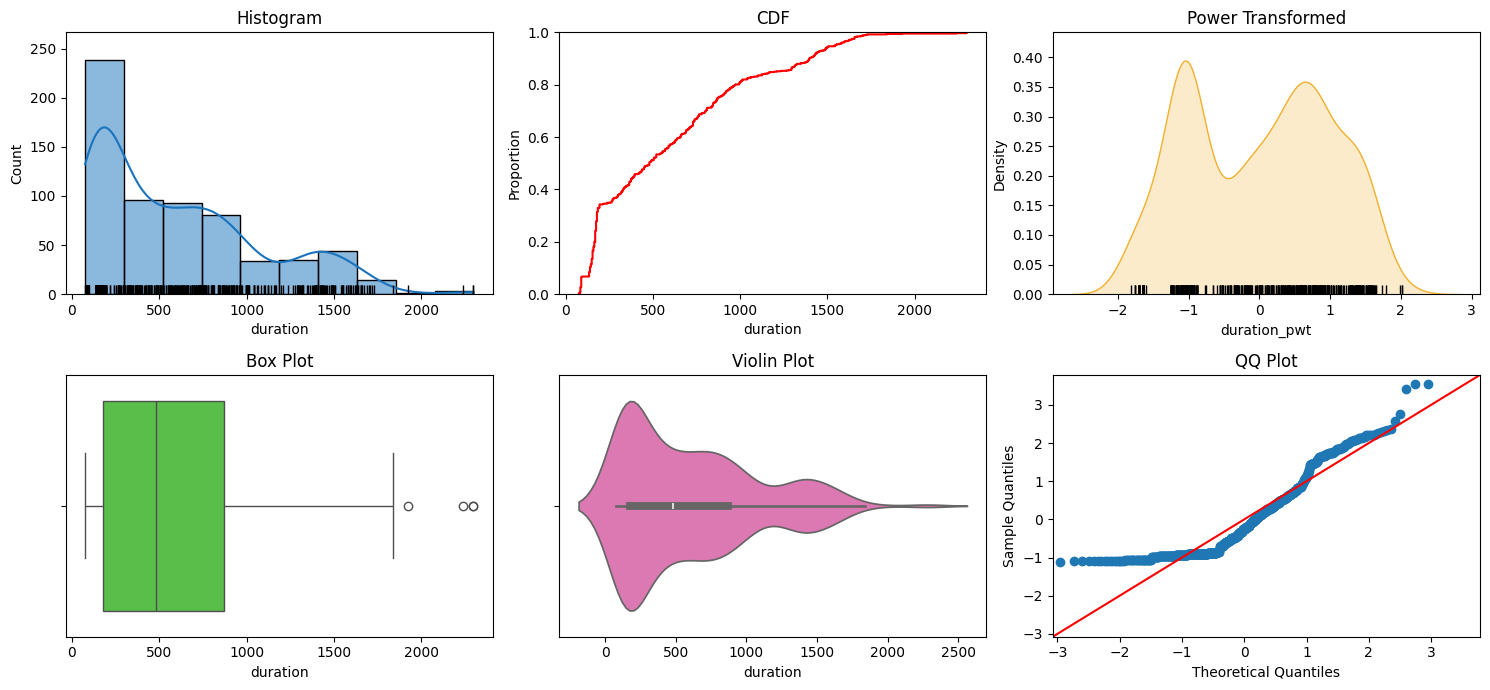

In [89]:
num_univar_plots(train, 'duration')

# plot 2 numerical plots


In [90]:
# bivariate plots between 2 numeric variables
def num_bivar_plots(data, var_x, var_y, figsize=(12, 4.5), scatter_kwargs=dict(), hexbin_kwargs=dict()):
  display_html(2, f"Bi-variate Analysis between {var_x} and {var_y}")
  display_html(content="")

  fig, axes = plt.subplots(1, 2, figsize=figsize)

  # scatter plot
  sns.scatterplot(
      data,
      x=var_x,
      y=var_y,
      ax=axes[0],
      edgecolors="black",
      **scatter_kwargs
  )
  axes[0].set(title="Scatter Plot")

  # hexbin plot
  col_x = data.loc[:, var_x]
  col_y = data.loc[:, var_y]
  hexbin = axes[1].hexbin(
      x=col_x,
      y=col_y,
      **hexbin_kwargs
  )
  axes[1].set(
      title="Hexbin Plot",
      xlabel=var_x,
      xlim=(col_x.min(), col_x.max()),
      ylim=(col_y.min(), col_y.max())
  )
  cb = plt.colorbar(
      hexbin,
      label="Count"
  )

  plt.tight_layout()
  plt.show()

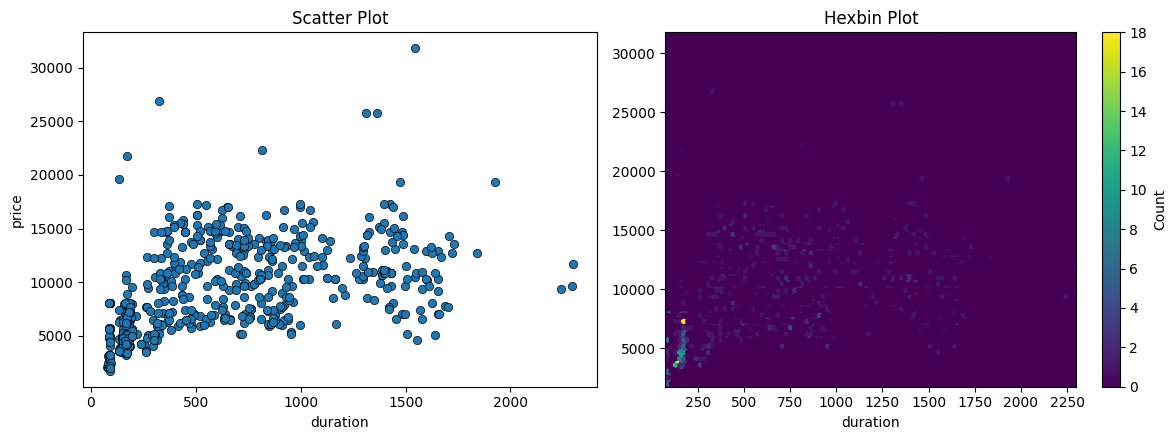

In [91]:
num_bivar_plots(train, 'duration', 'price')

# lets do num 2 num hypothesis testing

In [92]:

# hypothesis testing for association between 2 numeric variables
def num_num_hyp_testing(data, var1, var2, alpha=0.05):
  display_html(2, f"Hypothesis Test for Association between {var1} and {var2}")

  temp = (
      data
      .dropna(subset=[var1, var2], how="any")
      .copy()
  )

  # pearson test
  pearson = stats.pearsonr(temp[var1].values, temp[var2].values)
  pvalue = pearson.pvalue
  statistic = pearson.statistic
  display_html(3, "Pearson Test")
  print(f"- {'Significance Level':21}: {alpha * 100}%")
  print(f"- {'Null Hypothesis':21}: The samples are uncorrelated")
  print(f"- {'Alternate Hypothesis':21}: The samples are correlated")
  print(f"- {'Test Statistic':21}: {statistic}")
  print(f"- {'p-value':21}: {pvalue}")
  if pvalue < alpha:
    print(f"- Since p-value is less than {alpha}, we Reject the Null Hypothesis at {alpha * 100}% significance level")
    print(f"- CONCLUSION: The variables {var1} and {var2} are correlated")
  else:
    print(f"- Since p-value is greater than {alpha}, we Fail to Reject the Null Hypothesis at {alpha * 100}% significance level")
    print(f"- CONCLUSION: The variables {var1} and {var2} are uncorrelated")

  # spearman test
  spearman = stats.spearmanr(temp[var1].values, temp[var2].values)
  pvalue = spearman.pvalue
  statistic = spearman.statistic
  display_html(3, "Spearman Test")
  print(f"- {'Significance Level':21}: {alpha * 100}%")
  print(f"- {'Null Hypothesis':21}: The samples are uncorrelated")
  print(f"- {'Alternate Hypothesis':21}: The samples are correlated")
  print(f"- {'Test Statistic':21}: {statistic}")
  print(f"- {'p-value':21}: {pvalue}")
  if pvalue < alpha:
    print(f"- Since p-value is less than {alpha}, we Reject the Null Hypothesis at {alpha * 100}% significance level")
    print(f"- CONCLUSION: The variables {var1} and {var2} are correlated")
  else:
    print(f"- Since p-value is greater than {alpha}, we Fail to Reject the Null Hypothesis at {alpha * 100}% significance level")
    print(f"- CONCLUSION: The variables {var1} and {var2} are uncorrelated")


In [93]:
num_num_hyp_testing(train,'duration', 'price')

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.5274286406784835
- p-value              : 4.844090970229952e-47
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables duration and price are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.6677327649651076
- p-value              : 1.0358784298096832e-83
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables duration and price are correlated


# multivaraite analysis

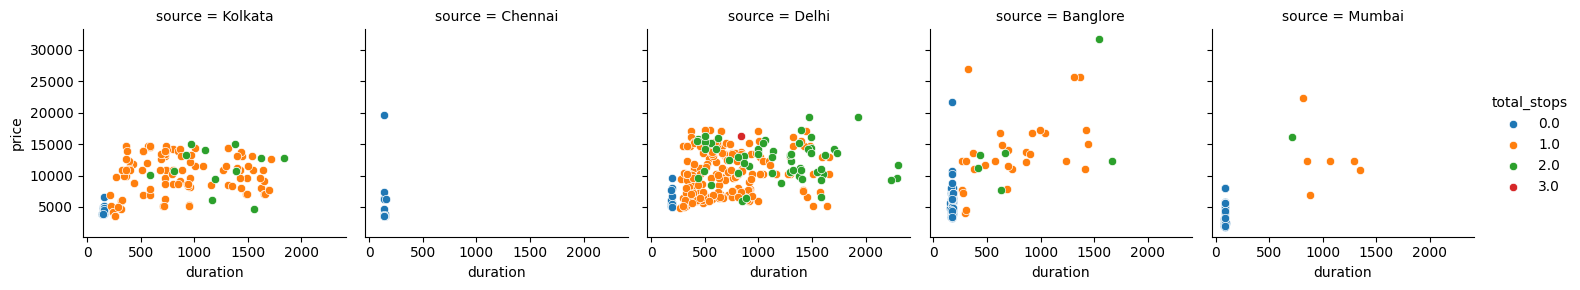

In [94]:
# we gonna use Facetgrid
duration_grid=sns.FacetGrid(
    data=train,
    col='source',
    hue='total_stops',
    sharey=True

)
# see har source k lie duration or price agya

duration_grid.map(sns.scatterplot, 'duration', 'price')
duration_grid.add_legend()

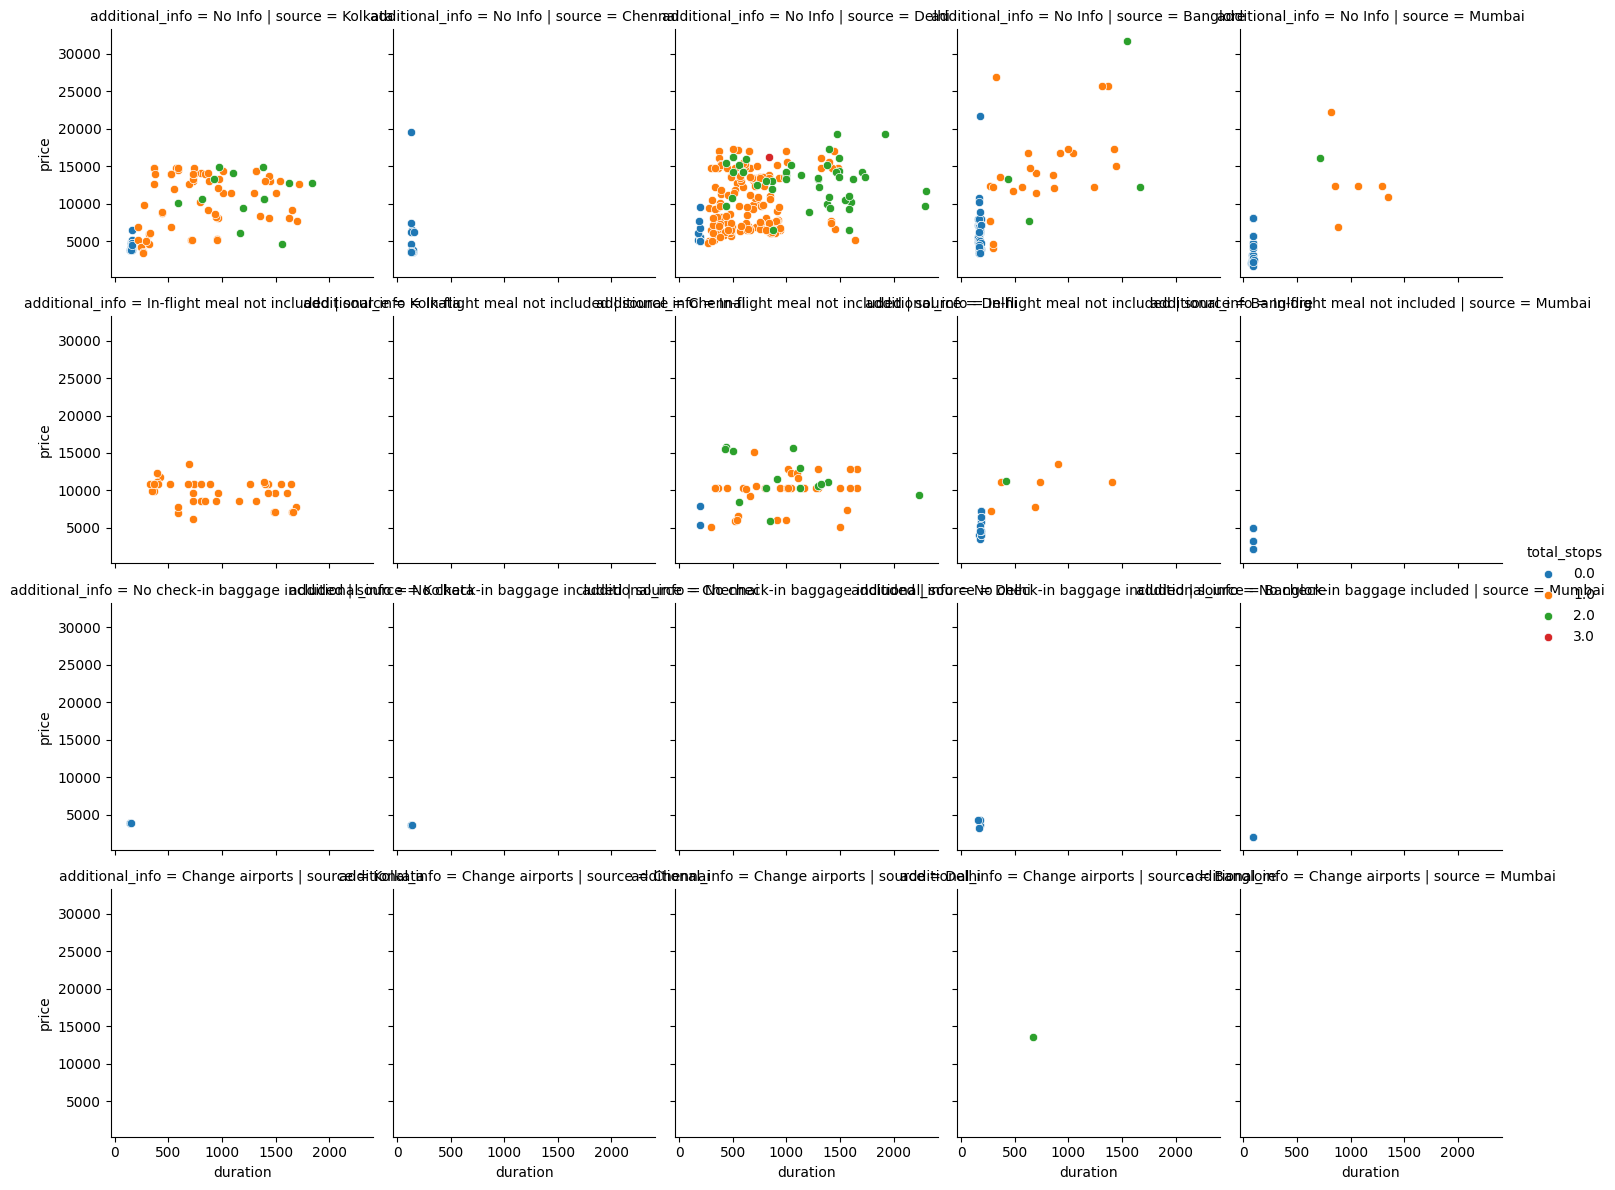

In [95]:
# # we gonna use Facetgrid
duration_grid=sns.FacetGrid(
    data=train,
    col='source',
    row='additional_info',
    hue='total_stops',
    sharey=True

)
# see har source k lie duration or price agya

duration_grid.map(sns.scatterplot, 'duration', 'price')
duration_grid.add_legend()

# now you see ek ek column krne se kitna tired ho rha
# so how to do Automate EDA

In [116]:
import matplotlib.pyplot as plt

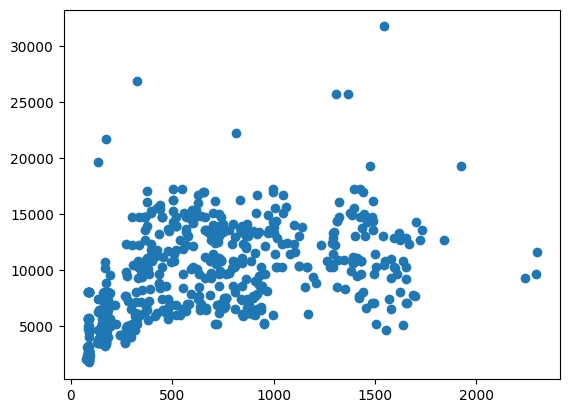

In [118]:
plt.scatter(train['duration'], train['price'])
plt.show()

# LIberaries are
# 1. Pandas Profiling(ydata-profiling)

# 2. Sweetviz


# 3. Autoviz

# 4. D-Tale

In [119]:
from ydata_profiling import ProfileReport

In [120]:
report=ProfileReport(train)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

ModuleNotFoundError: No module named 'matplotlib.backends.backend_svg'

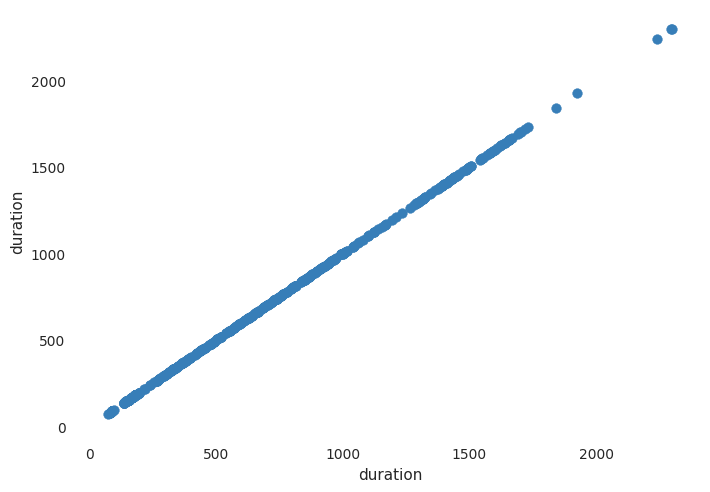

In [121]:
report.to_file(output_file='output.html')

In [114]:
import matplotlib.pyplot as plt

In [99]:
import pandas as pd

def get_iqr_outliers(data, var, band=1.5):
    # Calculate Q1 and Q3
    q1, q3 = data[var].quantile([0.25, 0.75])
    
    # Calculate IQR
    iqr = q3 - q1
    
    # Calculate lower and upper limits
    lower_limit = q1 - (band * iqr)
    upper_limit = q3 + (band * iqr)
    
    # Display the IQR limits
    print(f"{var}-IQR Limits:")
    print(f"{'Lower limit':<12}: {lower_limit}")
    print(f"{'Upper limit':<12}: {upper_limit}")
    
    # Return the outliers
    return data.query(f"{var} > @upper_limit or {var} < @lower_limit").sort_values(var)

# Example




In [100]:
get_iqr_outliers(train, 'duration')

duration-IQR Limits:
Lower limit : -871.25
Upper limit : 1918.75


,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
148,Jet Airways,2019-03-09,Delhi,Cochin,2024-05-28 10:45:00,2024-05-28 18:50:00,1925,2.0,No Info,19329
458,Jet Airways,2019-03-21,Delhi,Cochin,2024-05-28 05:30:00,2024-05-28 18:50:00,2240,2.0,In-flight meal not included,9328
10,Air India,2019-05-09,Delhi,Cochin,2024-05-28 05:00:00,2024-05-28 19:15:00,2295,2.0,No Info,9653
173,Jet Airways,2019-03-27,Delhi,Cochin,2024-05-28 05:25:00,2024-05-28 19:45:00,2300,2.0,No Info,11664
